In [1]:
from langgraph.graph import StateGraph , START , END 
#from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from typing import TypedDict 
from dotenv import load_dotenv


In [2]:
load_dotenv()

model = ChatGroq(model="llama-3.1-8b-instant")

In [3]:
# Define State 

class pcState(TypedDict):

    topic:  str #user input
    outline: str
    blog : str
    score : int

In [4]:
def outline(state:pcState )->pcState:

    topic = state['topic']

    # Define Prompt
    prompt =f'Create outline for the above topic : {topic}'

    # Define outline
    outline = model.invoke(prompt)

    # Return the value of outline
    state['outline'] = outline

    return state

In [5]:
def blog(state:pcState)->pcState:

    topic = state['topic']
    outline = state['outline']

    # Define prompt
    prompt = f'Create the detailed blog for this topic : {topic} /n with the help of above outline:/n/n  {outline}'

    # Define Blog
    blog = model.invoke(prompt)

    # Save value of Blog in State
    state['blog'] = blog

    return state

In [19]:
def evaluate(state: pcState)->pcState:

    outline = state['outline']
    blog = state['blog']

    # Define prompt
    prompt = f'Evaluate my blog /n/n {blog} /n/n based on this above outline : {outline} /n/n and generate the score which can only integer type , you cannot generate any other type of output for "score" , you can only output it "out of 100", you cannot give anytype of textual output in "score" '    

    # Define the score 
    score = model.invoke(prompt)

    # Store value of score in state
    state['score'] = score

    return state

In [ ]:
# Define Graph
graph = StateGraph(pcState)

# Define Nodes
graph.add_node('outline', outline)
graph.add_node('blog',blog)
graph.add_node('evaluate',evaluate)

# Define Edges
graph.add_edge(START,'outline')
graph.add_edge('outline','blog')
graph.add_edge('blog','evaluate')
graph.add_edge('evaluate',END)

# Compile graph
workflow = graph.compile()



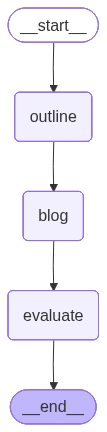

In [21]:
workflow

In [33]:
#Execute the graph

initial_state={'topic':'Tourism in INDIA '}

final_state = workflow.invoke(initial_state)

print(final_state)



{'topic': 'Tourism in INDIA ', 'outline': AIMessage(content="**I. Introduction to Tourism in India**\n\n- A. Overview of India's tourism industry\n- B. Importance of tourism in India's economy\n- C. Brief history of tourism in India\n\n**II. Types of Tourism in India**\n\n- A. Heritage Tourism\n- B. Adventure Tourism\n- C. Wildlife Tourism\n- D. Beach Tourism\n- E. Cultural Tourism\n- F. Spiritual Tourism\n- G. Eco-Tourism\n\n**III. Popular Tourist Destinations in India**\n\n- A. Historical Monuments:\n  - Taj Mahal (Agra)\n  - Red Fort (Delhi)\n  - Qutub Minar (Delhi)\n  - Humayun's Tomb (Delhi)\n- B. Hill Stations:\n  - Shimla (Himachal Pradesh)\n  - Manali (Himachal Pradesh)\n  - Ooty (Tamil Nadu)\n  - Mussoorie (Uttarakhand)\n- C. Beaches:\n  - Goa\n  - Kerala\n  - Puri (Odisha)\n  - Pondicherry\n- D. Wildlife Sanctuaries:\n  - Jim Corbett National Park (Uttarakhand)\n  - Ranthambore National Park (Rajasthan)\n  - Kanha National Park (Madhya Pradesh)\n- E. Cultural and Spiritual Ce

In [37]:
print(final_state['topic'])

Tourism in INDIA 


In [30]:
print(final_state['outline']. content)


Here's an outline for the topic "Tourism in India":

**I. Introduction**

- Definition of Tourism
- Importance of Tourism
- Brief overview of India's tourism industry

**II. India's Tourism Industry**

- History of Tourism in India
- Government policies and initiatives for tourism development
- Types of tourism in India (e.g. cultural, adventure, eco-tourism)

**III. Popular Tourist Destinations in India**

- List of top 10 tourist destinations in India (e.g. Taj Mahal, Red Fort, Goa beaches, etc.)
- Brief description of each destination
- Types of activities and attractions available at each destination

**IV. Cultural and Heritage Tourism**

- Overview of India's rich cultural heritage
- Famous monuments and historical sites (e.g. Varanasi, Hampi, Konark Sun Temple)
- Folk music, dance, and art forms

**V. Adventure and Wildlife Tourism**

- Overview of India's diverse geography and wildlife
- Popular adventure sports and activities (e.g. trekking, rafting, skiing)
- National parks a

In [31]:
print(final_state['blog'].content)

**Tourism in India: A Comprehensive Guide**

**Introduction**

Tourism is a vital sector of India's economy, contributing significantly to the country's GDP and employment opportunities. According to the World Tourism Organization (UNWTO), India has been consistently ranked among the top 30 tourism destinations in the world. In this article, we will delve into the history of tourism in India, its current state, and the various types of tourism that India has to offer.

**I. Definition of Tourism**

Tourism refers to the activities of persons traveling to and staying in places outside their usual environment for not more than one consecutive year for leisure, business, or other purposes. Tourism can be categorized into various types, including cultural, adventure, eco-tourism, and more.

**II. Importance of Tourism**

Tourism plays a vital role in the Indian economy, generating substantial revenue and creating employment opportunities. According to the Ministry of Tourism, India, the to

In [24]:
print(final_state['score'].content)

**Score: 92 / 100**
